# Harry Potter and the Philosopher's Stone 

## A statistical and literary analysis

### Initialization:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
sns.set_style("whitegrid")
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

In [2]:
book1 = open('book_1.txt').read()
book2 = open('book_2.txt').read()

In [3]:
book1 = book1.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("\'", "'")
book2 = book2.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("\'", "'")


In [4]:
class Chapter:
    def __init__(self, number, title, body):
        self.number = number
        self.title = title
        self.body = body
        wc = 0
        for sent in self.body:
            wc += len(sent.split(' '))
        self.wc = wc

In [5]:
class Book:
    def __init__(self, title, author, chapters, text, body):
        self.title = title
        self.author = author
        self.chapters = chapters
        self.chapter_names = []
        self.num_chapters = len(self.chapters)
        for i in range(self.num_chapters):
            self.chapter_names.append(self.chapters[i].title)
        self.wc = 0
        for i in range(self.num_chapters):
            self.wc += self.chapters[i].wc
        self.text = text
        self.body = body
            
    ## flag: t-title, b-body, w-wc, c-chapter, plain-plain body text
    def get(self, num, flag='c'):
        if flag == 't':
            return self.chapters[num-1].title
        elif flag == 'b':
            return self.chapters[num-1].body
        elif flag == 'w':
            return self.chapters[num-1].wc
        elif flag == 'c':
            return self.chapters[num-1]
        elif flag == 'plain':
            return ' '.join(self.chapters[num-1].body)
        else:
            print("Check flag parameter")

In [6]:
def book_creator(text):
    tmp = text.split('\n')
    sents = [s for s in tmp if s != '']
    title = sents[0]
    author = sents[2]
    sents = sents[sents.index('Chapter 1'):]
    
    indicies = []
    chapters = []
    body = []
    
    for i in range(len(sents)):
        if re.findall("Chapter", sents[i]):
            indicies.append(i)
    
    for i in range(len(indicies)):
        ch_number = int(''.join(list(filter(str.isdigit, sents[indicies[i]]))))
        ch_title = sents[indicies[i]+1]
        if i != len(indicies) - 1:
            ch_body = sents[indicies[i]+2:indicies[i+1]]
        else:
            ch_body = sents[indicies[i]+2:]
                
        chapters.append(Chapter(ch_number, ch_title, ch_body))
        body += ch_body
                
    return Book(title, author, chapters, sents, body)

In [7]:
HP = book_creator(book1)

### Character name count

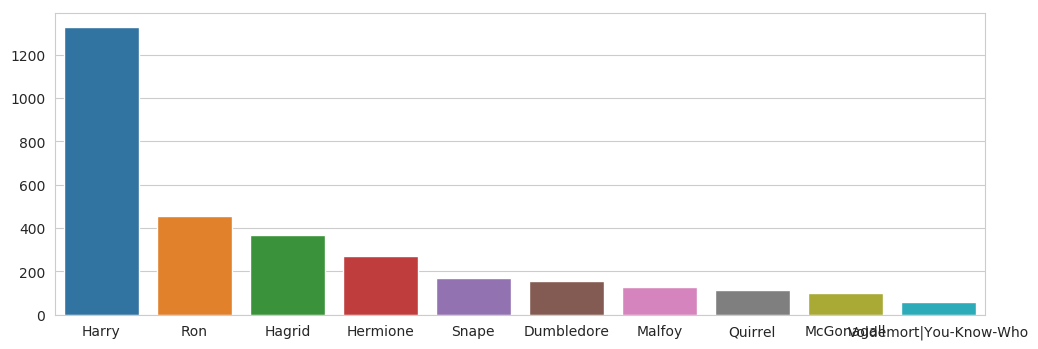

In [8]:
mains = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Dumbledore", "Malfoy", "Quirrel", "McGonagall", "Voldemort|You-Know-Who"]
mains_count = [len(re.findall(m, book1)) for m in mains]

ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

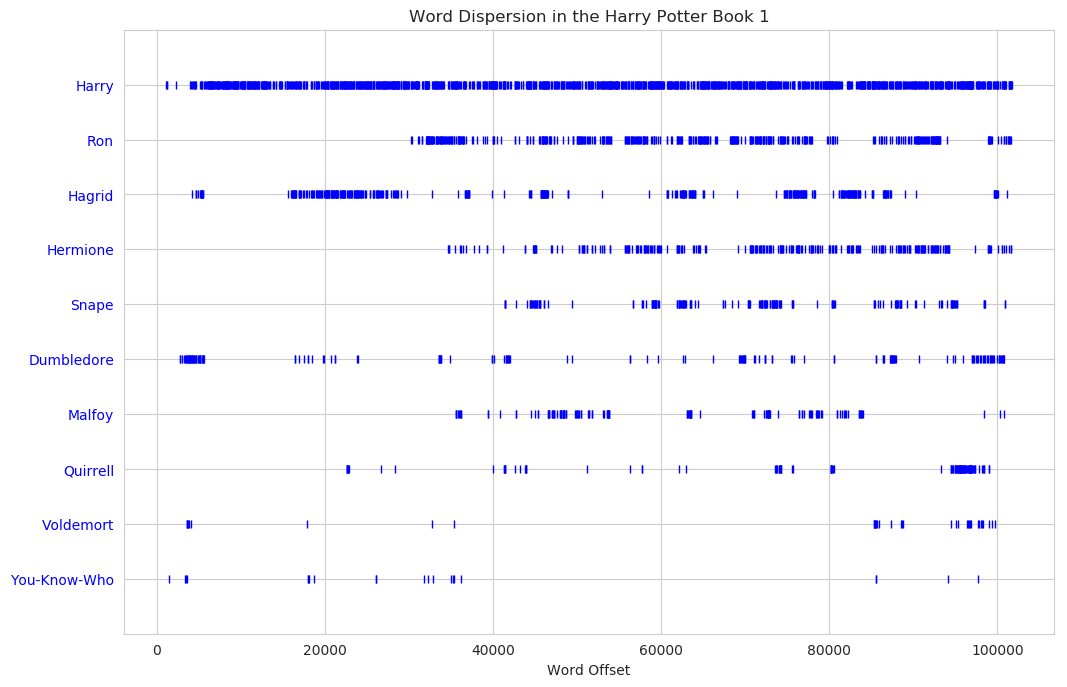

In [9]:
tokens = nltk.word_tokenize(' '.join(HP.body))
mytext = nltk.Text(tokens)

words = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Dumbledore", "Malfoy", "Quirrell", "Voldemort", "You-Know-Who"]
plt.subplots(figsize=(12,8),dpi=100)
nltk.draw.dispersion.dispersion_plot(
    mytext, words, ignore_case=False,
    title='Word Dispersion in the Harry Potter Book 1'
)

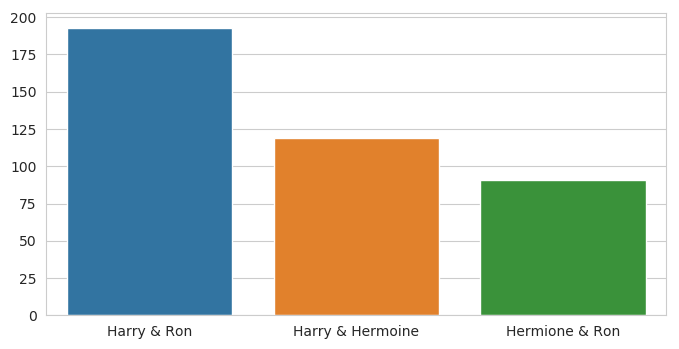

In [10]:
body = '\n'.join(HP.body)
mains = ["Harry.*Ron|Ron.*Harry", "Harry.*Hermione|Hermione.*Harry", "Hermione.*Ron|Ron.*Hermione"]
labels = ['Harry & Ron', 'Harry & Hermoine', 'Hermione & Ron']
mains_count = [len(re.findall(m, body)) for m in mains]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)
_ = plt.xticks([0, 1, 2], labels)

### Locations count

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

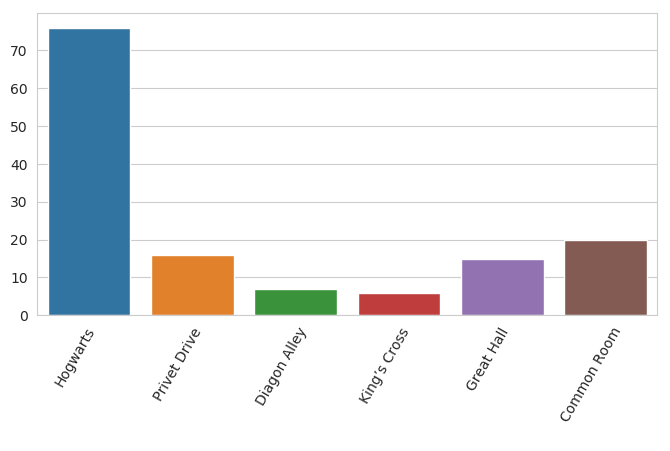

In [11]:
body = ' '.join(HP.body)
loc = ["Hogwarts", "Privet", "Diagon Alley", "King’s Cross", "Great Hall", "(c|C)ommon (r|R)oom"]
xticks = ["Hogwarts\n\n", "Privet Drive\n\n", "Diagon Alley\n\n", "King’s Cross\n\n", "Great Hall\n\n", "Common Room\n\n"]
loc_count = [len(re.findall(l, body)) for l in loc]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=loc_count)
plt.xticks(rotation=60)

### Spell count

Text(0, 0.5, 'Count')

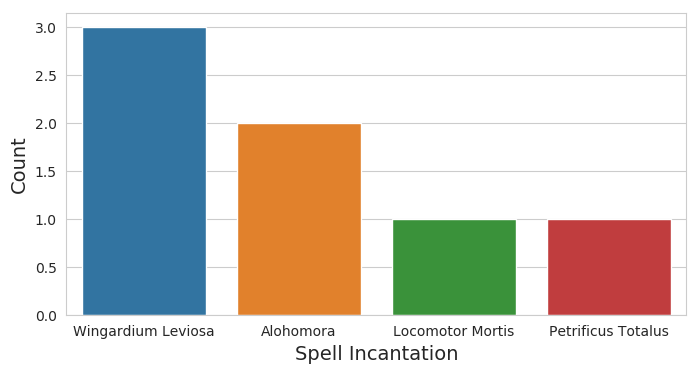

In [12]:
body = ' '.join(HP.body)
spells = ["Wingardium Leviosa", "Alohomora", "Locomotor Mortis", "Petrificus Totalus"]
spell_count = [len(re.findall(s, body)) for s in spells]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=spells, y=spell_count)
ax.set_xlabel("Spell Incantation", fontsize=14)
_ = ax.set_ylabel("Count", fontsize=14)

### Subject mention count 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

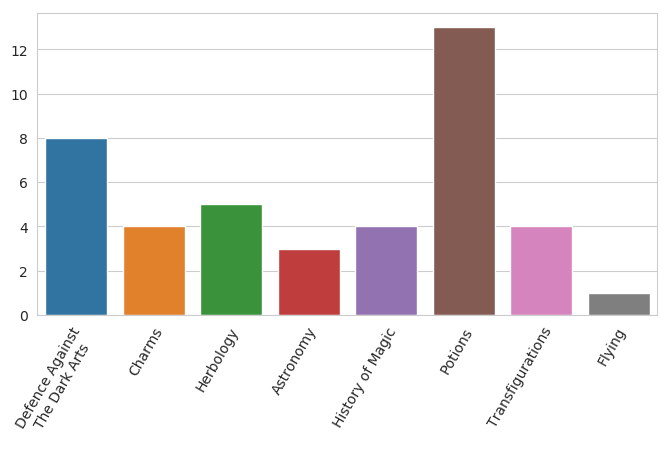

In [13]:
body = ' '.join(HP.body)
sub = ["Dark Arts", "Charms", "Herbology", "Astronomy", "History of Magic", "Potions", "Transfiguration", "Flying"]
xticks = ["Defence Against\nThe Dark Arts\n\n\n", "Charms\n", "Herbology\n\n", "Astronomy\n\n", "History of Magic\n\n\n", "Potions\n", "Transfigurations\n\n\n", "Flying\n"]
sub_count = [len(re.findall(s, body)) for s in sub]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=sub_count)
_ = plt.xticks(rotation=60)

### Chapters Word Count

In [71]:
body = [HP.get(i, 'b') for i in range(1, HP.num_chapters+1)]
ch_pos = [0]
for ch_body in body:
    ch_pos.append(ch_pos[-1]+len(ch_body))
        
print(ch_pos)

[0, 110, 210, 343, 496, 788, 1075, 1262, 1354, 1565, 1729, 1866, 2072, 2196, 2335, 2523, 2843, 3072]


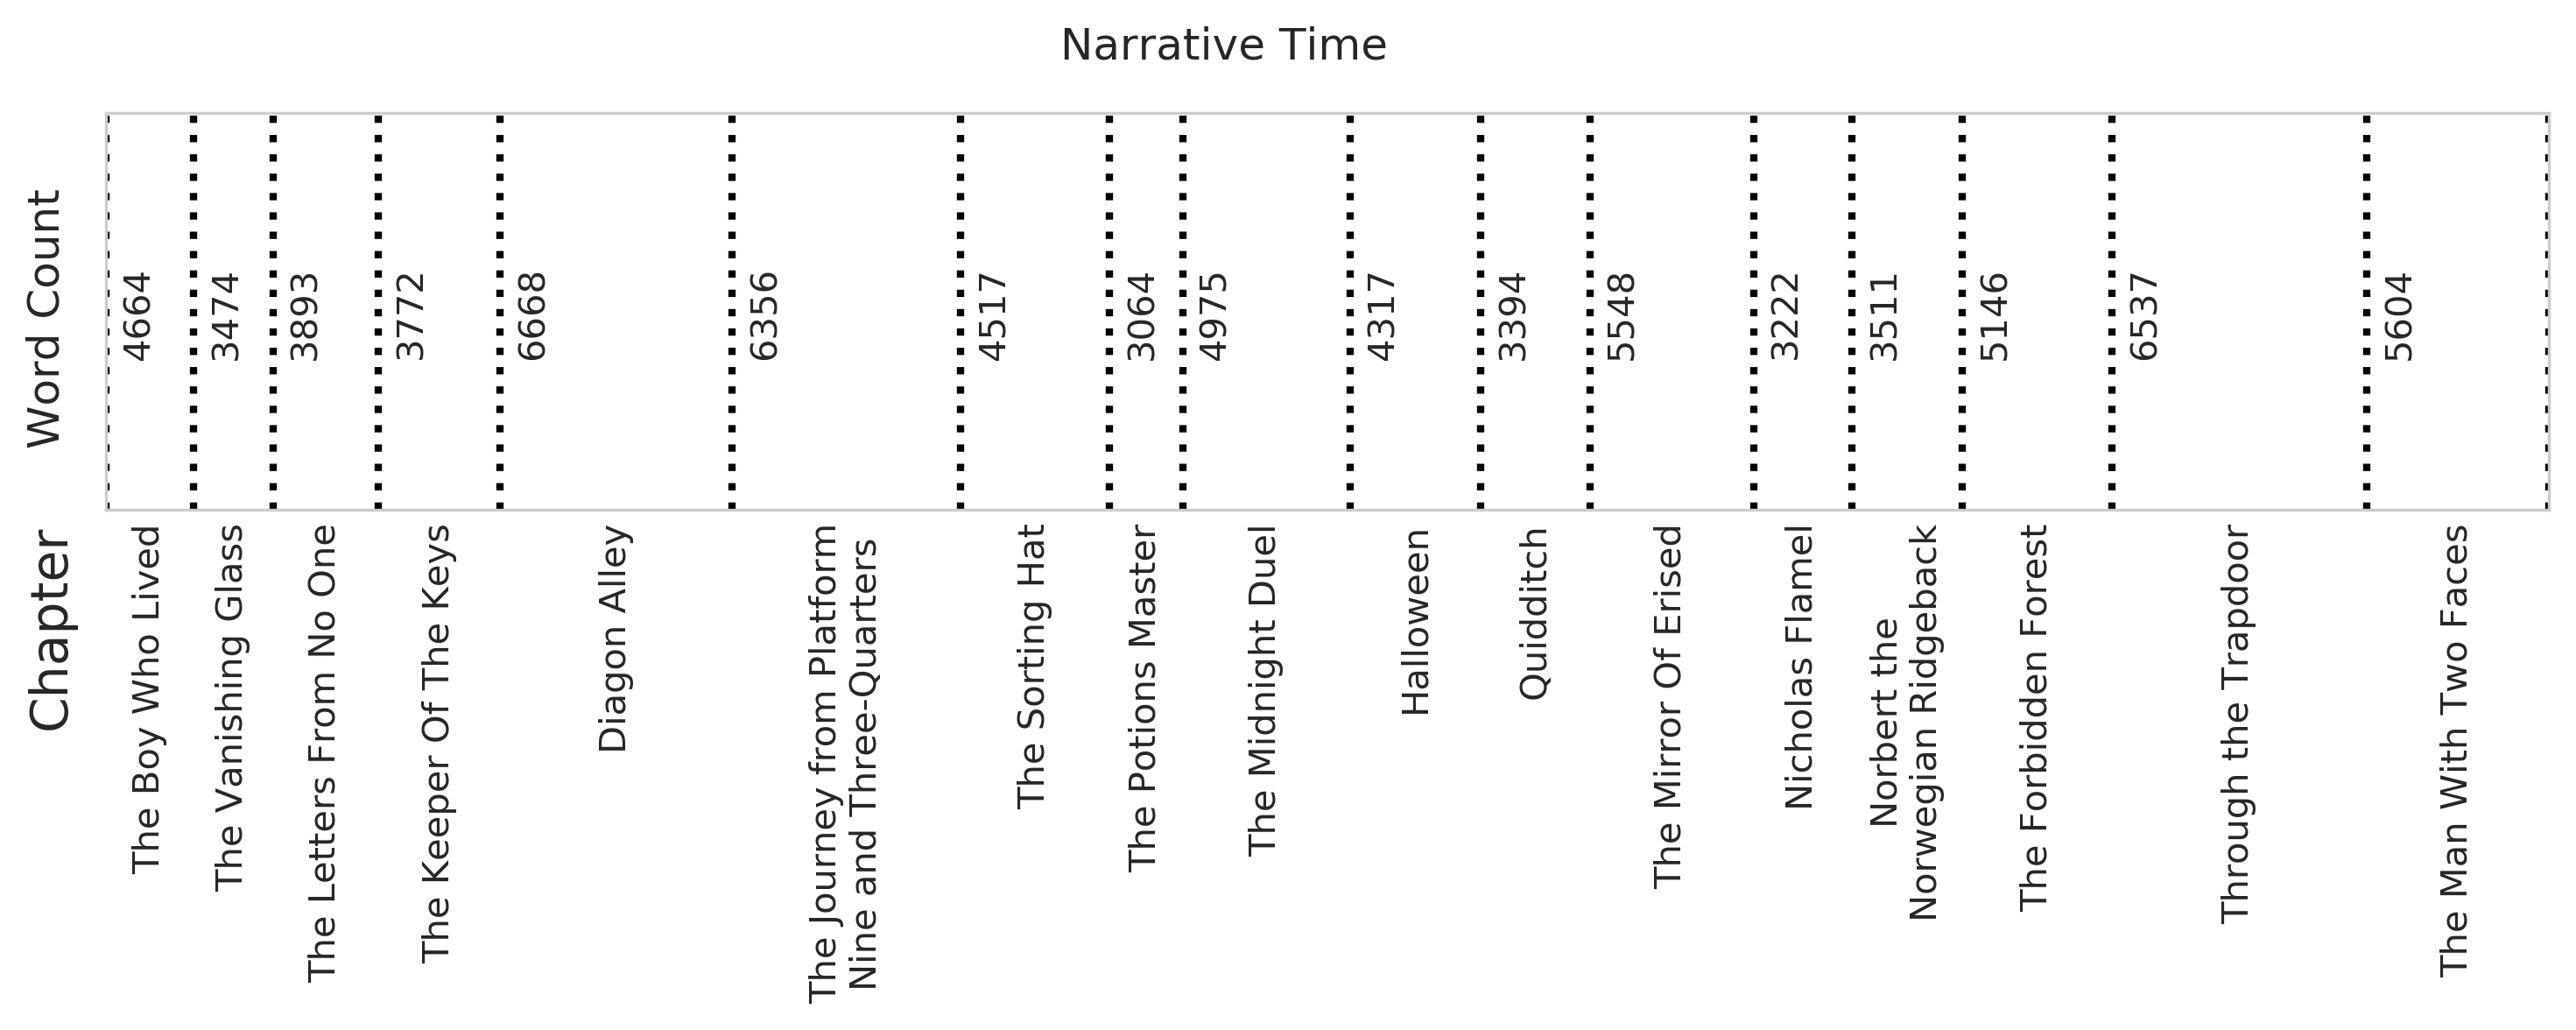

In [72]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(12,2),dpi=300)
ax = sns.lineplot(x=[], y=[])
ax.set_xlim(0, ch_pos[-1])
ax.set(yticks=[])
ax.xaxis.set_label_position('top') 
ax.grid(False)
ax.tick_params(length=0)

plt.text(x=1200, y=0.07, s="Narrative Time", fontsize=12)
plt.text(x=-100, y=0.025, s="Word Count", rotation=90, fontsize=12)
plt.text(x=-100, y=-0.07, s="Chapter", rotation=90, fontsize=14)
for ch in ch_pos:
    plt.axvline(x=ch, color='black', linewidth=2, linestyle=':')
    if ch_pos.index(ch) != len(ch_pos)-1:
        plt.text(x=ch+20, y=0.005, s=str(HP.get(ch_pos.index(ch)+1, 'w')), rotation=90)
    
x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']
    

_ = plt.xticks([(ch_pos[i-1] + ch_pos[i])/2 for i in range(1, len(ch_pos))], x_labels, rotation=90,
           fontsize=10)

### Chapters Sentence Length 

In [16]:
sent_len_list = []
for i in range(1, (HP.num_chapters + 1)):
    sum = 0
    body = HP.get(i, 'b')
    for s in body:
        sum += len(s.split(' '))
    sent_len_list.append(sum/len(body))

sent_len_list = [round(x) for x in sent_len_list]
print(sent_len_list)
    

[42, 35, 29, 25, 23, 22, 24, 33, 24, 26, 25, 27, 26, 25, 27, 20, 24]


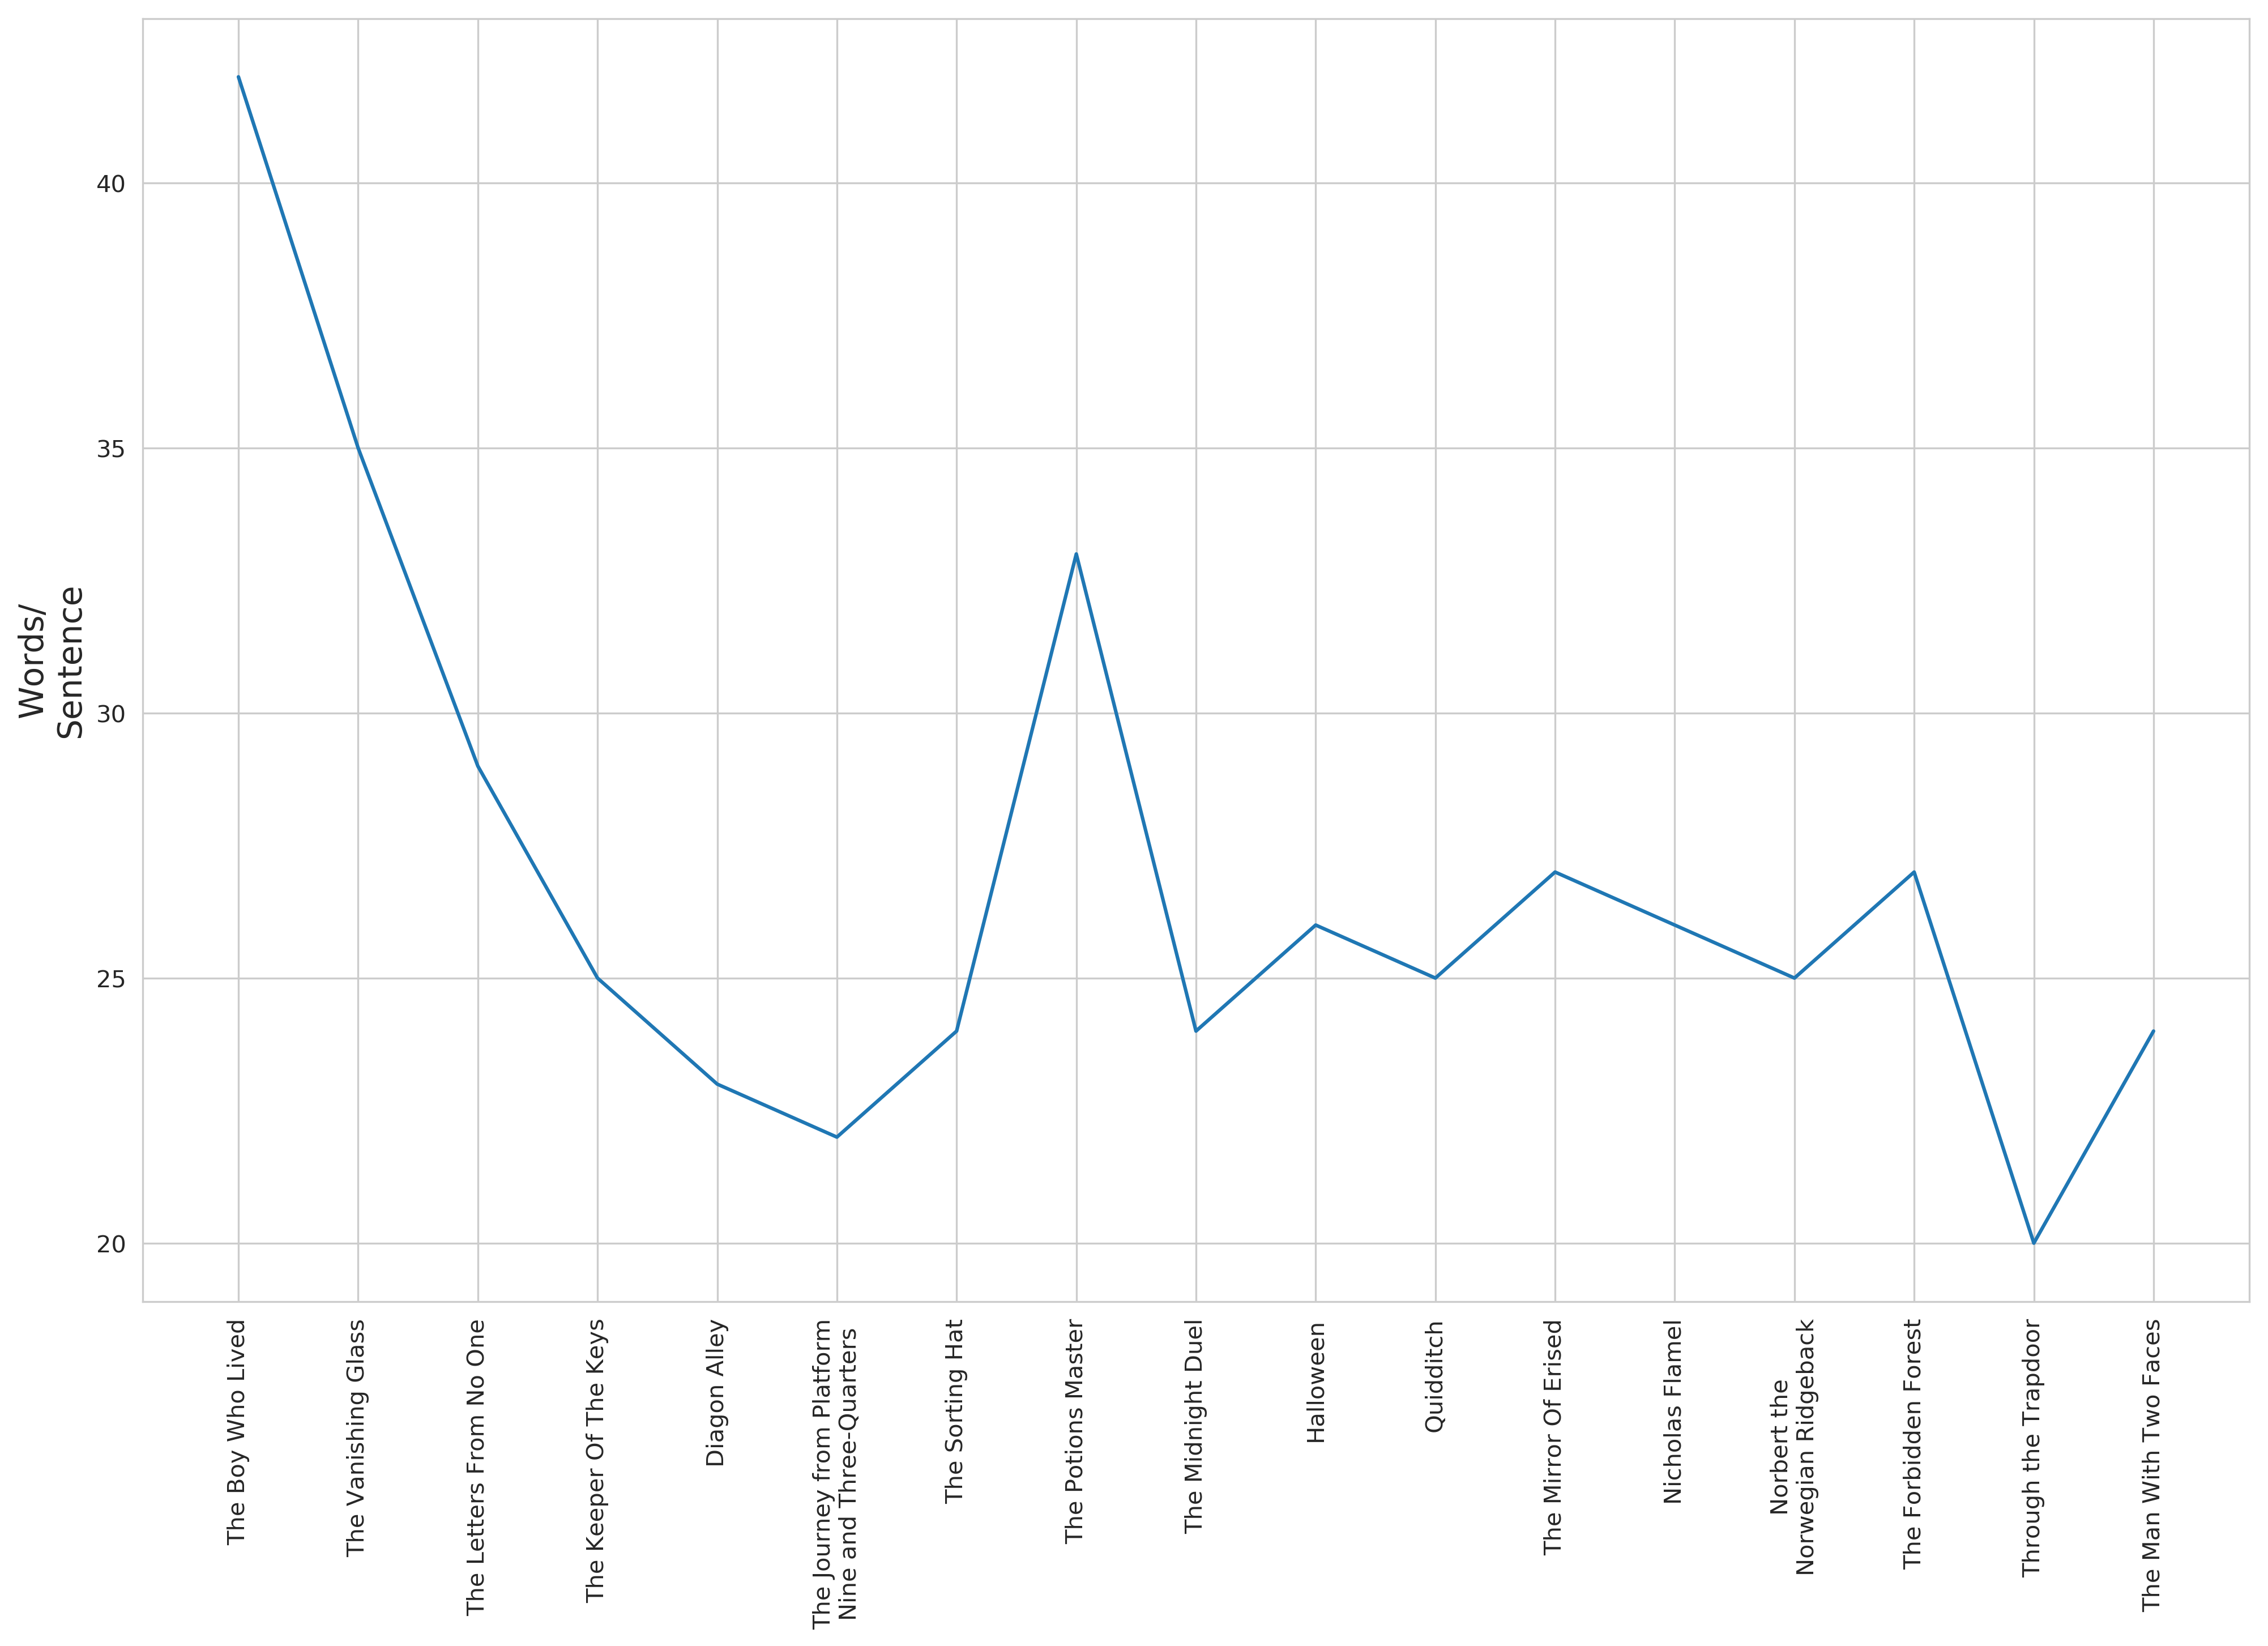

In [17]:
x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']

ax = plt.subplots(figsize=(16,10),dpi=300)
ax = sns.lineplot(x=x_labels, y=sent_len_list, sort=False)
ax.set_ylabel("Words/\nSentence", fontsize=14)

_ = plt.xticks(rotation=90, fontsize=10)

### Hero's Journey Breakdown

Status Quo: Chapter 1 (The Boy Who Lived) - Chapter 2 (The Vanishing Glass) <br>
Call to Adventure: Chapter 3 (The Letters From No One) - Chapter 4 (The Keeper Of The Keys) <br>
Assistance: Chapter 5 (Diagon Alley) <br>
Departure: Chapter 6 (The Journey from Platform Nine and Three-Quarters) <br>
Trials: Chapter 7 (The Sorting Hat) - Chapter 15 (The Forbidden Forest) <br>
Approach: Chapter 16 (Through the Trapdoor) <br>
Crisis: Chapter 17 (The Man With Two Faces)[0:81] <br>
Treasure: Chapter 17 (The Man With Two Faces)[81:102] <br>
Result: Chapter 17 (The Man With Two Faces)[102:203] <br>
Return: Chapter 17 (The Man With Two Faces)[203:213] <br>
New Life: Chapter 17 (The Man With Two Faces)[213:228] <br>
Resolution: Chapter 17 (The Man With Two Faces)[229] <br>

In [18]:
heros_journey_count = {
    'Status Quo': [0, 0], 'Call to Adventure': [0, 0], 'Assistance': [0, 0], 'Departure': [0, 0], 'Trials': [0, 0], 
    'Approach': [0, 0], 'Crisis': [0, 0], 'Treasure': [0, 0], 'Result': [0, 0], 'Return': [0, 0], 
    'New Life': [0, 0], 'Resolution': [0, 0]
}

In [19]:
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    text = HP.get(i, 'b')
    if i == 1 or i == 2:
        heros_journey_count['Status Quo'][0] += len(text)
        heros_journey_count['Status Quo'][1] += len(' '.join(text).split(' '))
    elif i == 3 or i == 4:
        heros_journey_count['Call to Adventure'][0] += len(text)
        heros_journey_count['Call to Adventure'][1] += len(' '.join(text).split(' '))
    elif i == 5:
        heros_journey_count['Assistance'][0] += len(text)
        heros_journey_count['Assistance'][1] += len(' '.join(text).split(' '))
    elif i == 6:
        heros_journey_count['Departure'][0] += len(text)
        heros_journey_count['Departure'][1] += len(' '.join(text).split(' '))
    elif i in range(7, 16):
        heros_journey_count['Trials'][0] += len(text)
        heros_journey_count['Trials'][1] += len(' '.join(text).split(' '))
    elif i == 16:
        heros_journey_count['Approach'][0] += len(text)
        heros_journey_count['Approach'][1] += len(' '.join(text).split(' '))
    elif i == 17:
        heros_journey_count['Crisis'][0] += len(text[0:81])
        heros_journey_count['Crisis'][1] += len(' '.join(text[0:81]).split(' '))
        
        heros_journey_count['Treasure'][0] += len(text[81:102])
        heros_journey_count['Treasure'][1] += len(' '.join(text[81:102]).split(' '))
        
        heros_journey_count['Result'][0] += len(text[102:203])
        heros_journey_count['Result'][1] += len(' '.join(text[102:203]).split(' '))
        
        heros_journey_count['Return'][0] += len(text[203:213])
        heros_journey_count['Return'][1] += len(' '.join(text[203:213]).split(' '))
        
        heros_journey_count['New Life'][0] += len(text[213:228])
        heros_journey_count['New Life'][1] += len(' '.join(text[213:228]).split(' '))
        
        heros_journey_count['Resolution'][0] += len([text[228]])
        heros_journey_count['Resolution'][1] += len(text[228].split(' '))

In [20]:
hero_df = pd.DataFrame.from_dict(heros_journey_count, orient='index').reset_index()
hero_df.columns = ['Stage', 'Sent Count', 'Word Count']
#hero_df['Word Count'] = [*zip(*list(heros_journey_count.values()))][1]

In [21]:
hero_df

,Stage,Sent Count,Word Count
0,Status Quo,210,8138
1,Call to Adventure,286,7665
2,Assistance,292,6668
3,Departure,287,6356
4,Trials,1448,37694
5,Approach,320,6537
6,Crisis,81,1950
7,Treasure,21,411
8,Result,101,2776
9,Return,10,245


### Stages Word Count

In [73]:
wc = [HP.get(i, 'w') for i in range(1, HP.num_chapters+1)]
ch_pos = [0]
for count in wc:
    ch_pos.append(ch_pos[-1]+count)
        
print(ch_pos)

[0, 4664, 8138, 12031, 15803, 22471, 28827, 33344, 36408, 41383, 45700, 49094, 54642, 57864, 61375, 66521, 73058, 78662]


In [74]:
stage_pos = [0]
for num in hero_df['Word Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 8138, 15803, 22471, 28827, 66521, 73058, 75008, 75419, 78195, 78440, 78620, 78662]


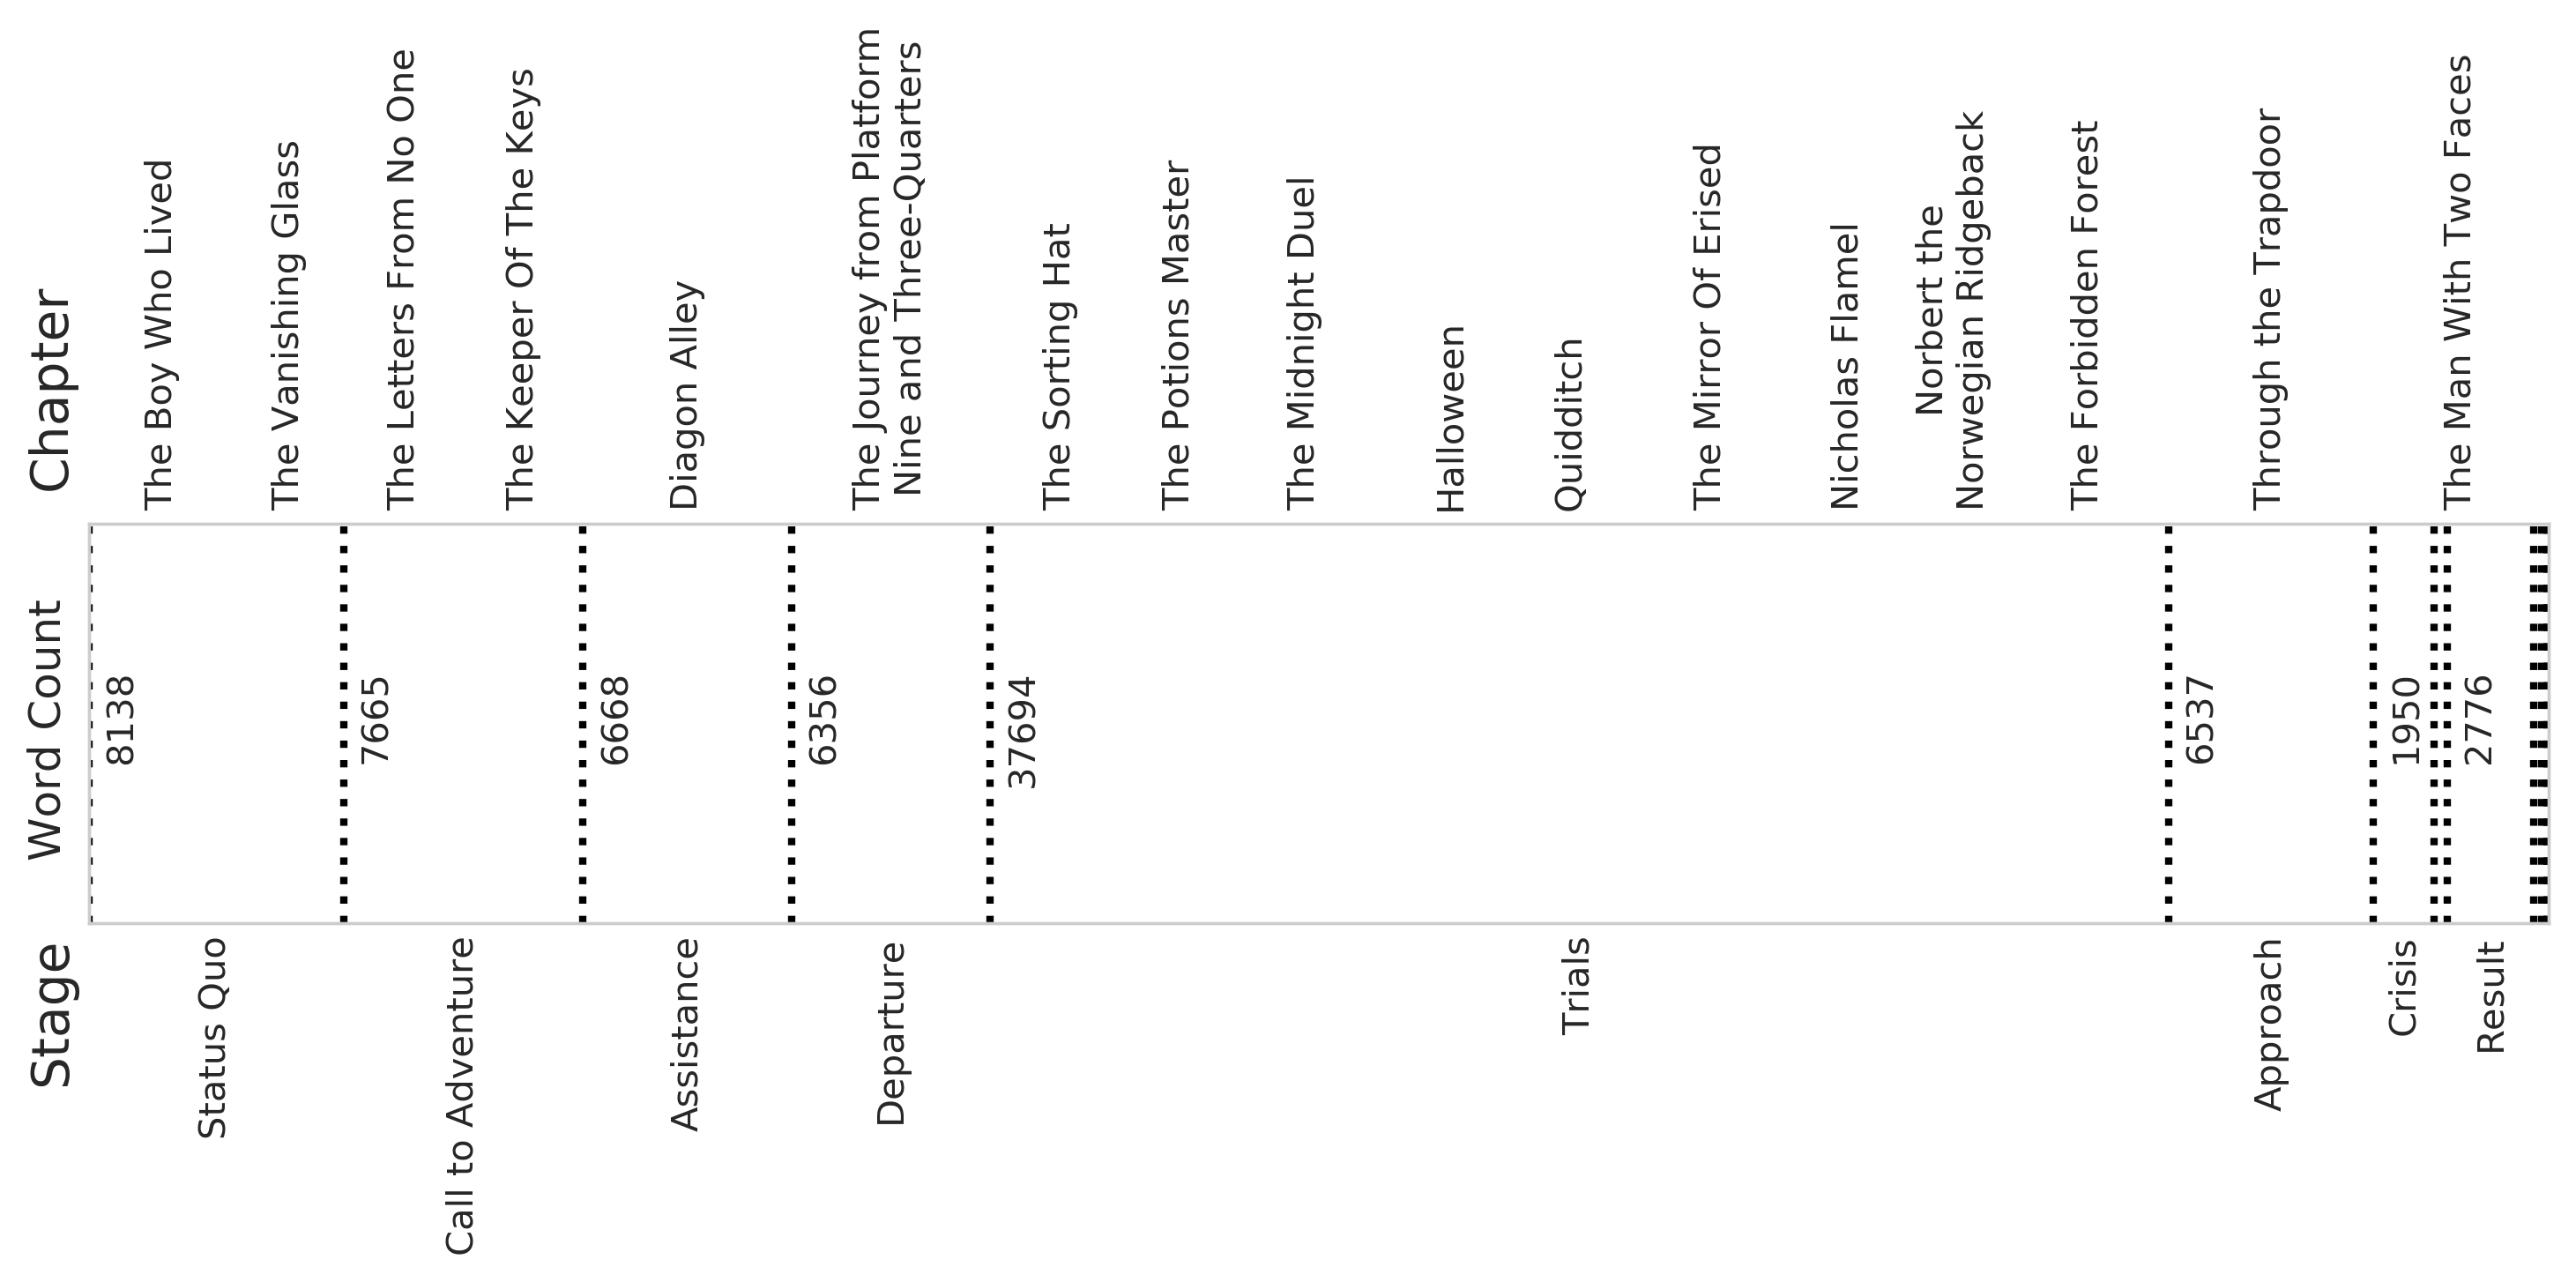

In [75]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(12,2),dpi=300)
ax = sns.lineplot(x=[], y=[])
ax.set_xlim(0, stage_pos[-1])
ax.set(yticks=[])

ax.xaxis.set_label_position('top') 

#plt.text(x=30000, y=0.07, s="Narrative Time", fontsize=12)
plt.text(x=-2000, y=0.11, s="Chapter", rotation=90, fontsize=14)
plt.text(x=-2000, y=0.025, s="Word Count", rotation=90, fontsize=12)
plt.text(x=-2000, y=-0.07, s="Stage", rotation=90, fontsize=14)
for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    if i < 9 and i != 7:
        plt.text(x=stage_pos[i]+500, y=0.007, s=hero_df['Word Count'][i], rotation=90)
    

_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=90,
           fontsize=10)
ax.grid(False)
ax.tick_params(length=0)

x_labels = ['The Boy Who Lived','The Vanishing Glass','The Letters From No One','The Keeper Of The Keys',
 'Diagon Alley','The Journey from Platform\nNine and Three-Quarters','The Sorting Hat','The Potions Master',
 'The Midnight Duel','Halloween','Quidditch','The Mirror Of Erised','Nicholas Flamel',
 'Norbert the\nNorwegian Ridgeback','The Forbidden Forest','Through the Trapdoor','The Man With Two Faces']

ax2 = ax.twiny()
ax2.grid(False)
ax2.tick_params(length=0)
ax2.set_xlim(0, stage_pos[-1])
ax2.set_xticks([(ch_pos[i-1] + ch_pos[i])/2 for i in range(1, len(ch_pos))])
_ = ax2.set_xticklabels(x_labels, rotation=90, fontsize=10)

### Stages Sentence Length

In [76]:
for s,w in zip(hero_df['Sent Count'], hero_df['Word Count']):
    print(w/s)

38.75238095238095
26.8006993006993
22.835616438356166
22.146341463414632
26.031767955801104
20.428125
24.074074074074073
19.571428571428573
27.485148514851485
24.5
12.0
42.0


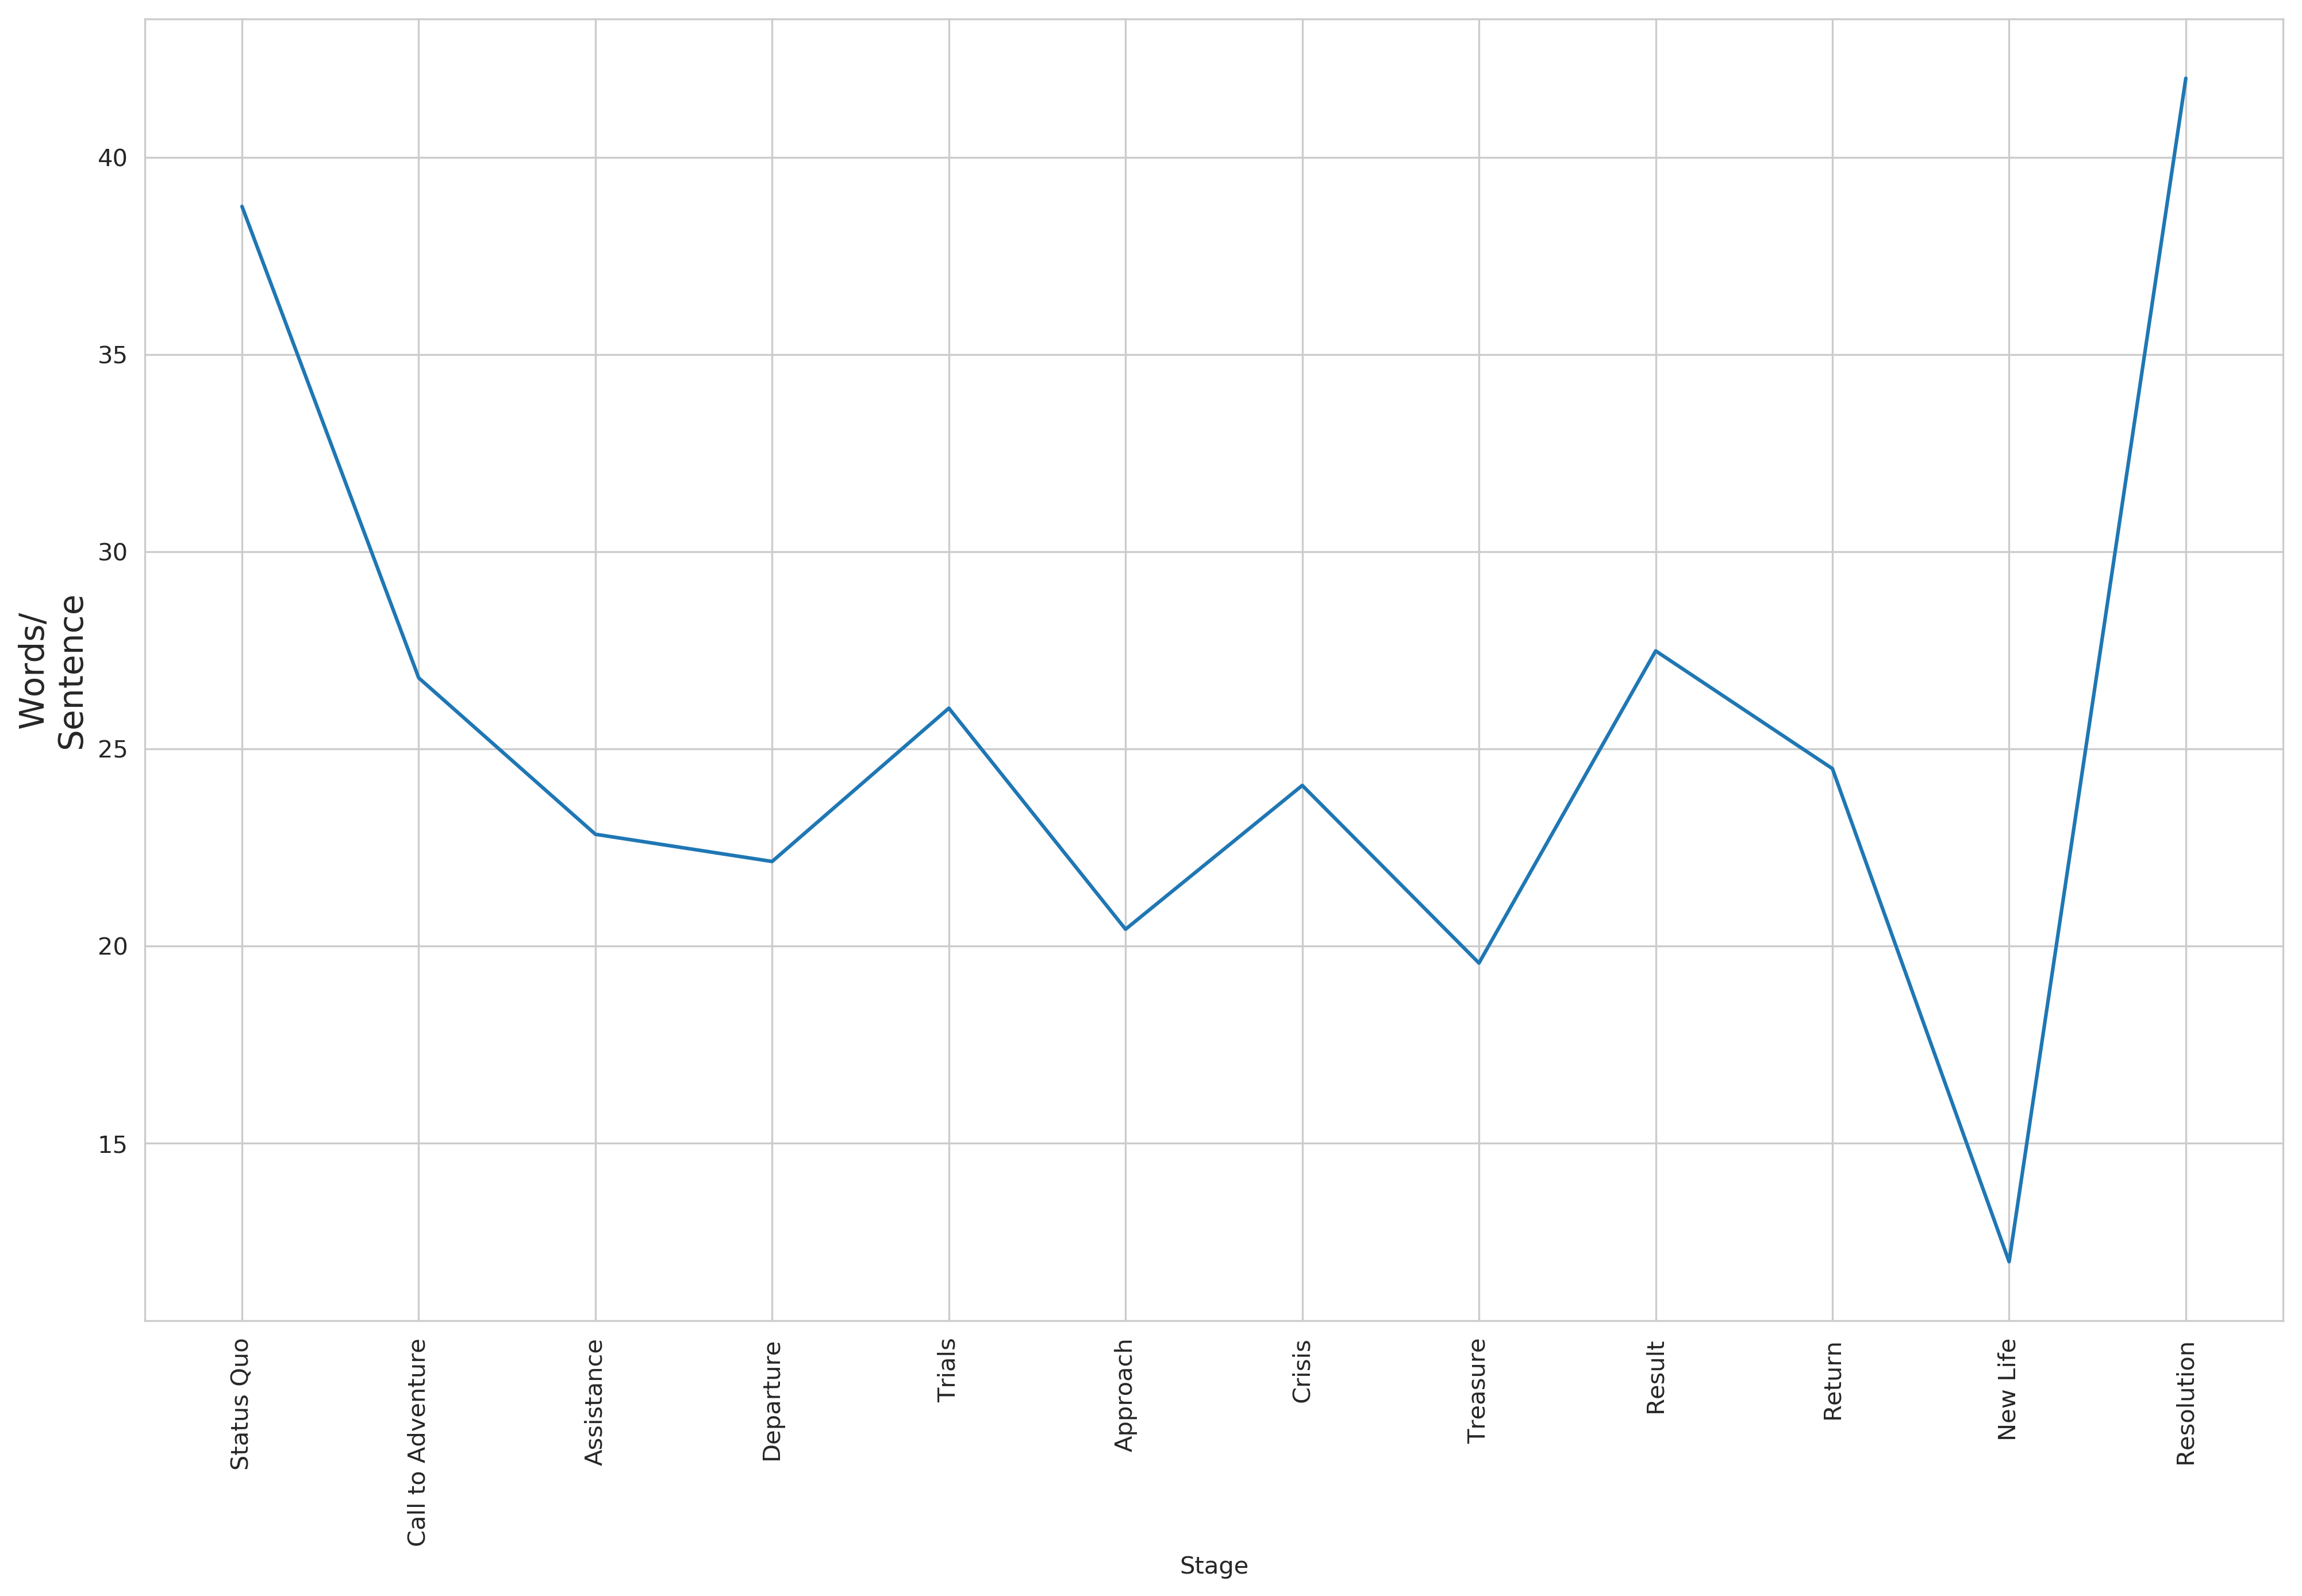

In [77]:
ax = plt.subplots(figsize=(16,10),dpi=300)
ax = sns.lineplot(x=hero_df['Stage'], y=[w/s for s,w in zip(hero_df['Sent Count'], hero_df['Word Count'])], sort=False)
ax.set_ylabel("Words/\nSentence", fontsize=14)

_ = plt.xticks(rotation=90, fontsize=10)

### Parts-of-speech Tagging

In [78]:
pos_dict = {"Nouns": [], "Adjectives": [], "Verbs": [], "Prepositions": [], "Injunctions": [], "Determiners": []}
body = HP.body
for sent in body:
    tagged = nltk.pos_tag(nltk.word_tokenize(sent))
    sent_len = len(tagged)
    pos_dict['Nouns'].append((len([tup[0] for tup in tagged if (tup[0] not in ['Mr.', 'Mrs.']) and re.findall("^N.*", tup[1])]))/sent_len)
    pos_dict['Adjectives'].append((len([tup[0] for tup in tagged if re.findall("^J.*", tup[1])]))/sent_len)
    pos_dict['Verbs'].append((len([tup[0] for tup in tagged if re.findall("^VB.*", tup[1])]))/sent_len)
    pos_dict['Prepositions'].append((len([tup[0] for tup in tagged if re.findall("^PRP.*", tup[1])]))/sent_len)
    pos_dict['Injunctions'].append((len([tup[0] for tup in tagged if re.findall("^IN.*", tup[1])]))/sent_len)
    pos_dict['Determiners'].append((len([tup[0] for tup in tagged if re.findall("^DT.*", tup[1])]))/sent_len)


In [79]:
pos_df = pd.DataFrame.from_dict(pos_dict)

In [80]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, n_bins, a_bins, v_bins, p_bins, i_bins, d_bins = ([] for i in range(7))
num_parts = 64
parts = int(len(pos_df['Nouns'])/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    n_bins.append(sumRange(pos_df['Nouns'], i*parts, (i+1)*parts)/(3072/num_parts))
    a_bins.append(sumRange(pos_df['Adjectives'], i*parts, (i+1)*parts)/(3072/num_parts))
    v_bins.append(sumRange(pos_df['Verbs'], i*parts, (i+1)*parts)/(3072/num_parts))
    p_bins.append(sumRange(pos_df['Prepositions'], i*parts, (i+1)*parts)/(3072/num_parts))
    i_bins.append(sumRange(pos_df['Injunctions'], i*parts, (i+1)*parts)/(3072/num_parts))
    d_bins.append(sumRange(pos_df['Determiners'], i*parts, (i+1)*parts)/(3072/num_parts))
    
pos_dict['Nouns'] = n_bins
pos_dict['Adjectives'] = a_bins
pos_dict['Verbs'] = v_bins
pos_dict['Prepositions'] = p_bins
pos_dict['Injunctions'] = i_bins
pos_dict['Determiners'] = d_bins
    
pos_df = pd.DataFrame.from_dict(pos_dict)
pos_df['x_ticks'] = indicies
pos_df.set_index('x_ticks', inplace=True)

In [81]:
pos_df.head()

,Nouns,Adjectives,Verbs,Prepositions,Injunctions,Determiners
x_ticks,,,,,,
24.0,0.194186,0.054047,0.165727,0.098077,0.077241,0.062510
72.0,0.179874,0.055397,0.184611,0.100699,0.055475,0.049752
120.0,0.251350,0.045340,0.150234,0.076025,0.073386,0.065779
168.0,0.223273,0.040275,0.170781,0.097589,0.077371,0.061965
216.0,0.288682,0.056300,0.150048,0.072647,0.079078,0.068657


In [82]:
stage_pos = [0]
for num in hero_df['Sent Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 210, 496, 788, 1075, 2523, 2843, 2924, 2945, 3046, 3056, 3071, 3072]


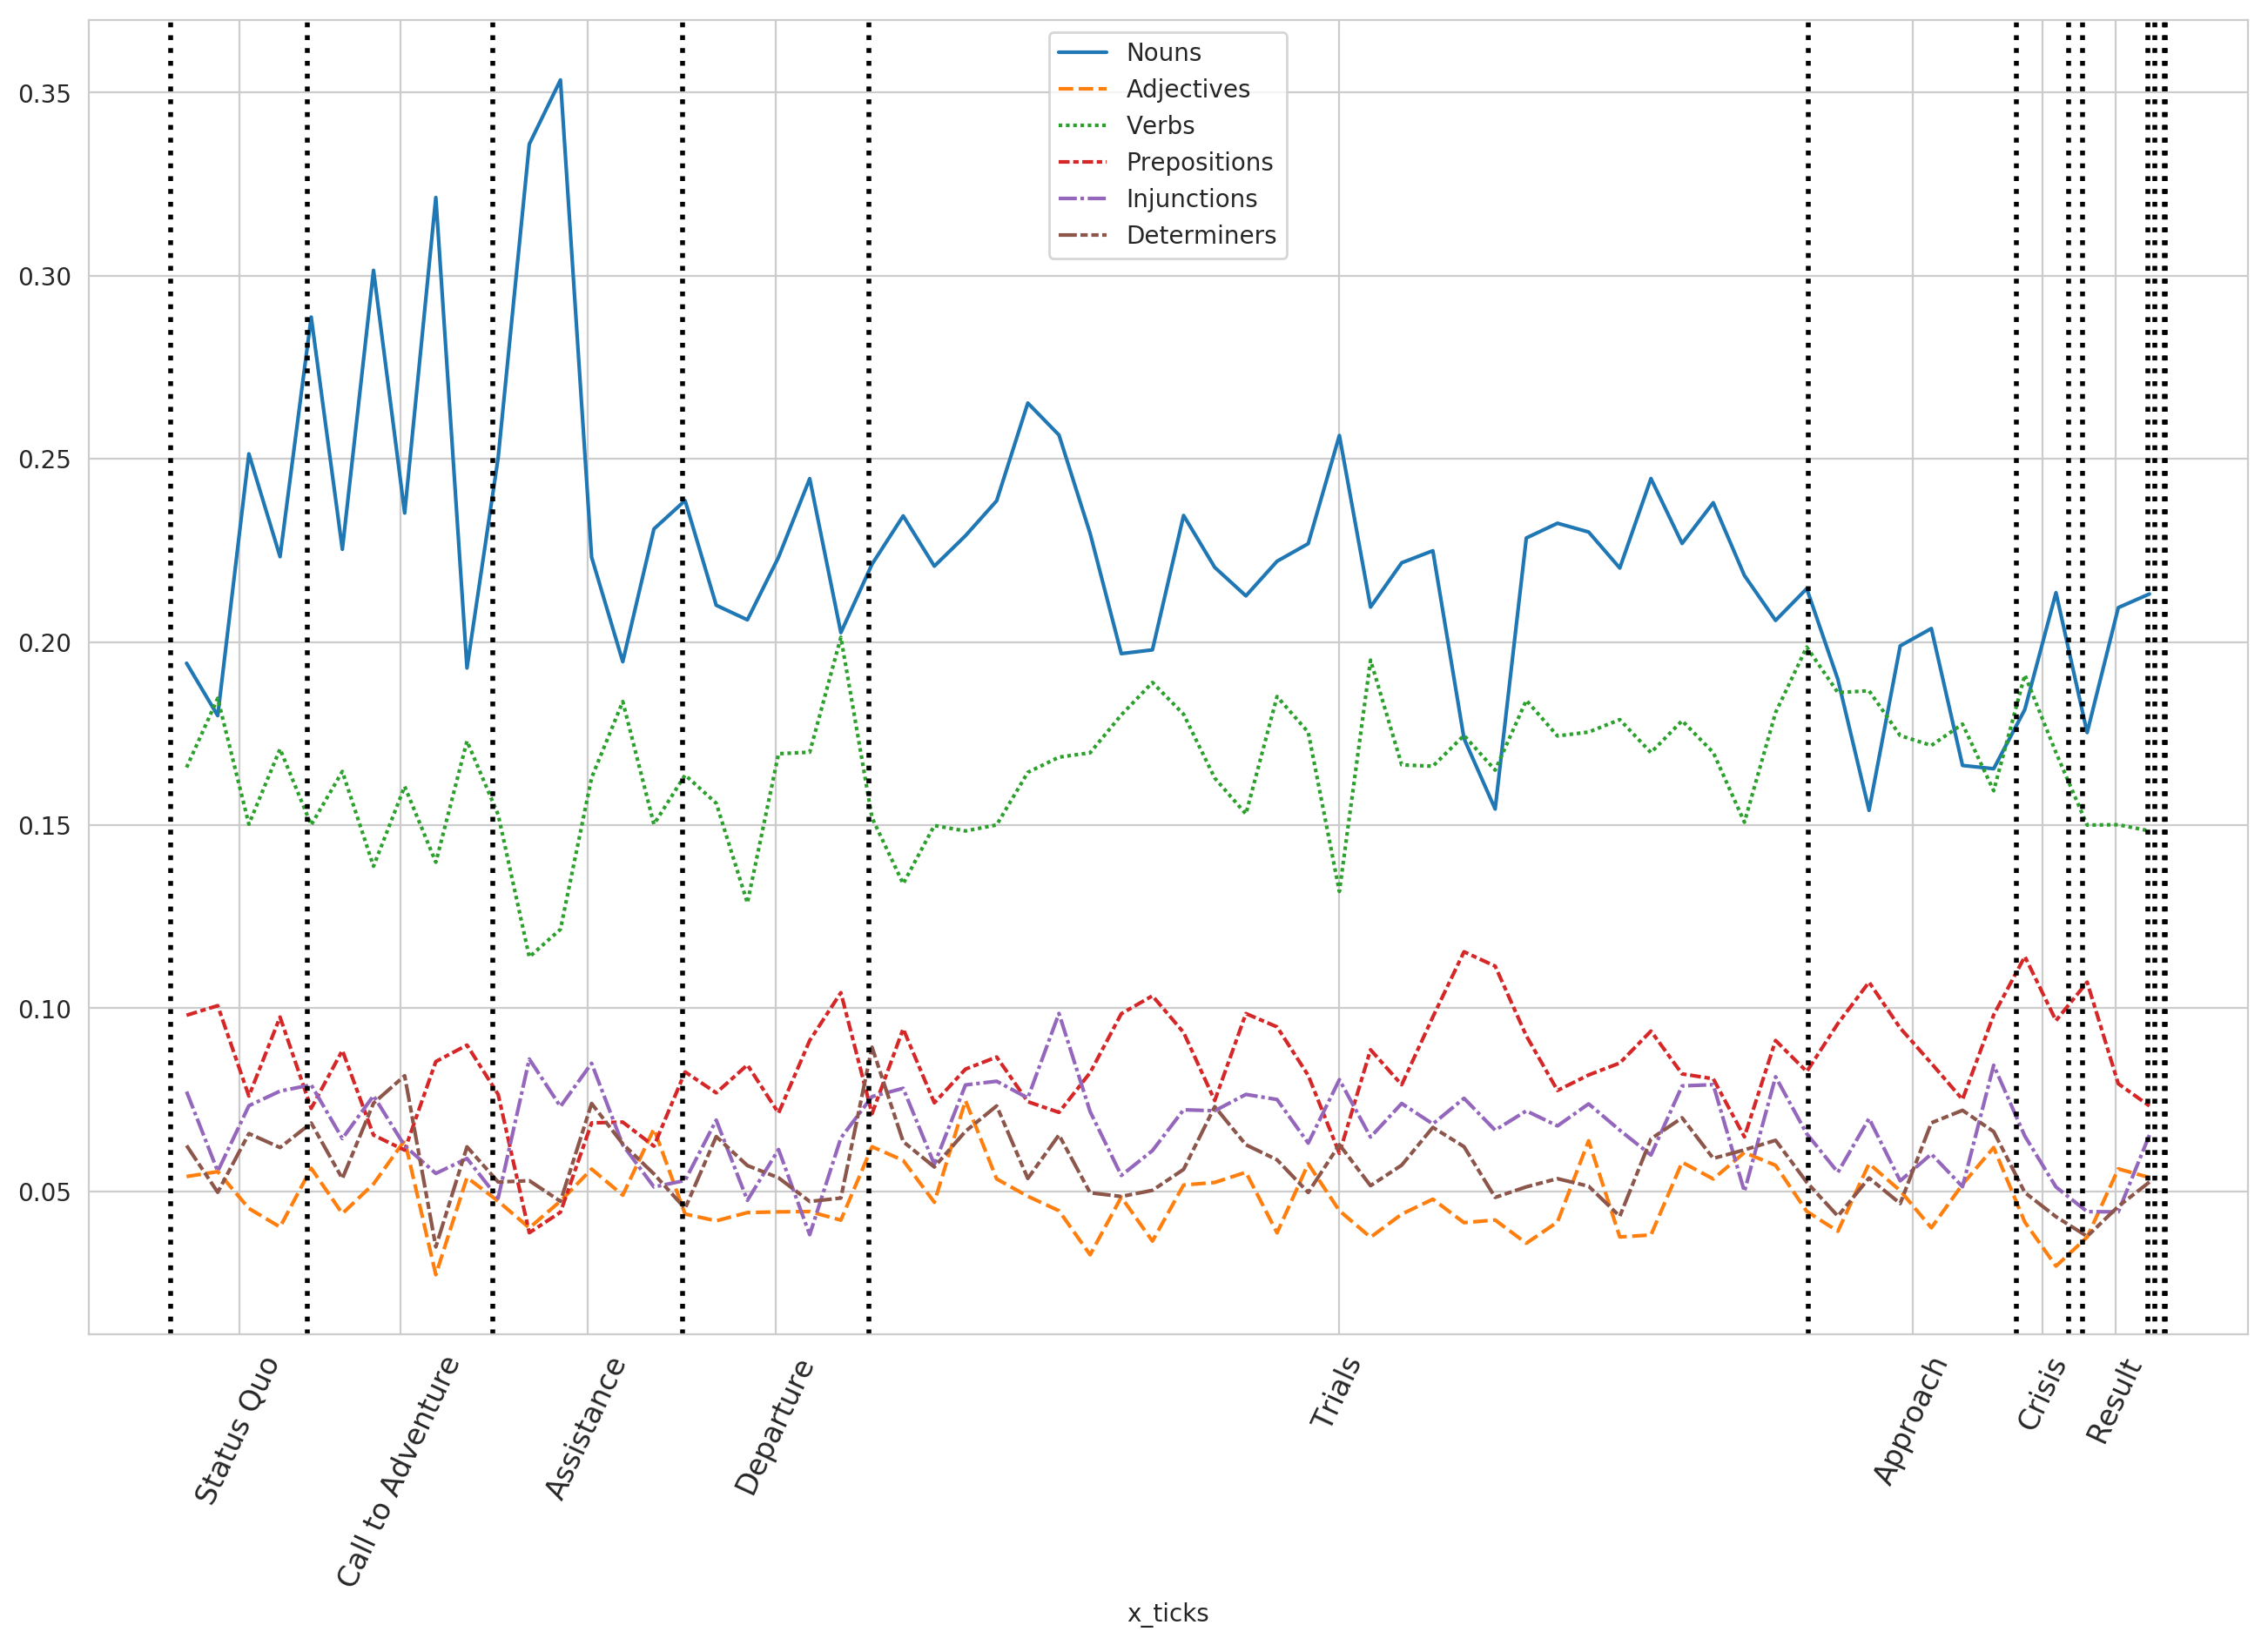

In [83]:
ax = plt.subplots(figsize=(16,10),dpi=200)
ax = sns.lineplot(data=pos_df)

for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    

_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=65,
           fontsize=12)

### Sentiment Analysis

In [36]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
compound = []
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    sentence_list = HP.get(i, 'b')
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        compound.append(vs['compound'])
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']
        
    print(HP.get(i, 't'), ': ', sentiments['compound'] / len(sentence_list))
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

The Boy Who Lived :  0.13042090909090912
The Vanishing Glass :  -0.025489
The Letters From No One :  0.003945864661654132
The Keeper Of The Keys :  -0.008934640522875813
Diagon Alley :  0.08248287671232876
The Journey from Platform Nine and Three-Quarters :  0.04768954703832753
The Sorting Hat :  0.09343957219251343
The Potions Master :  0.07009565217391303
The Midnight Duel :  -0.005237914691943127
Halloween :  0.03358353658536588
Quidditch :  -0.02669854014598541
The Mirror Of Erised :  0.0801019417475728
Nicholas Flamel :  0.02437983870967741
Norbert the Norwegian Ridgeback :  0.021236690647482025
The Forbidden Forest :  -0.10576170212765948
Through the Trapdoor :  0.014536562500000006
The Man With Two Faces :  0.03728908296943231


In [37]:
#sum(map(lambda x:x,compound[64:128]))

In [38]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, bins = ([] for i in range(2))
num_parts = 64
parts = int(len(compound)/num_parts)
for i in range(0,num_parts):
    indicies.append((i*parts + (i+1)*parts)/2)
    bins.append(sumRange(compound, i*parts, (i+1)*parts)/(3072/num_parts))
    

In [42]:
stage_pos = [0]
for num in hero_df['Sent Count']:
    stage_pos.append(stage_pos[-1]+num)
        
print(stage_pos)

[0, 210, 496, 788, 1075, 2523, 2843, 2924, 2945, 3046, 3056, 3071, 3072]


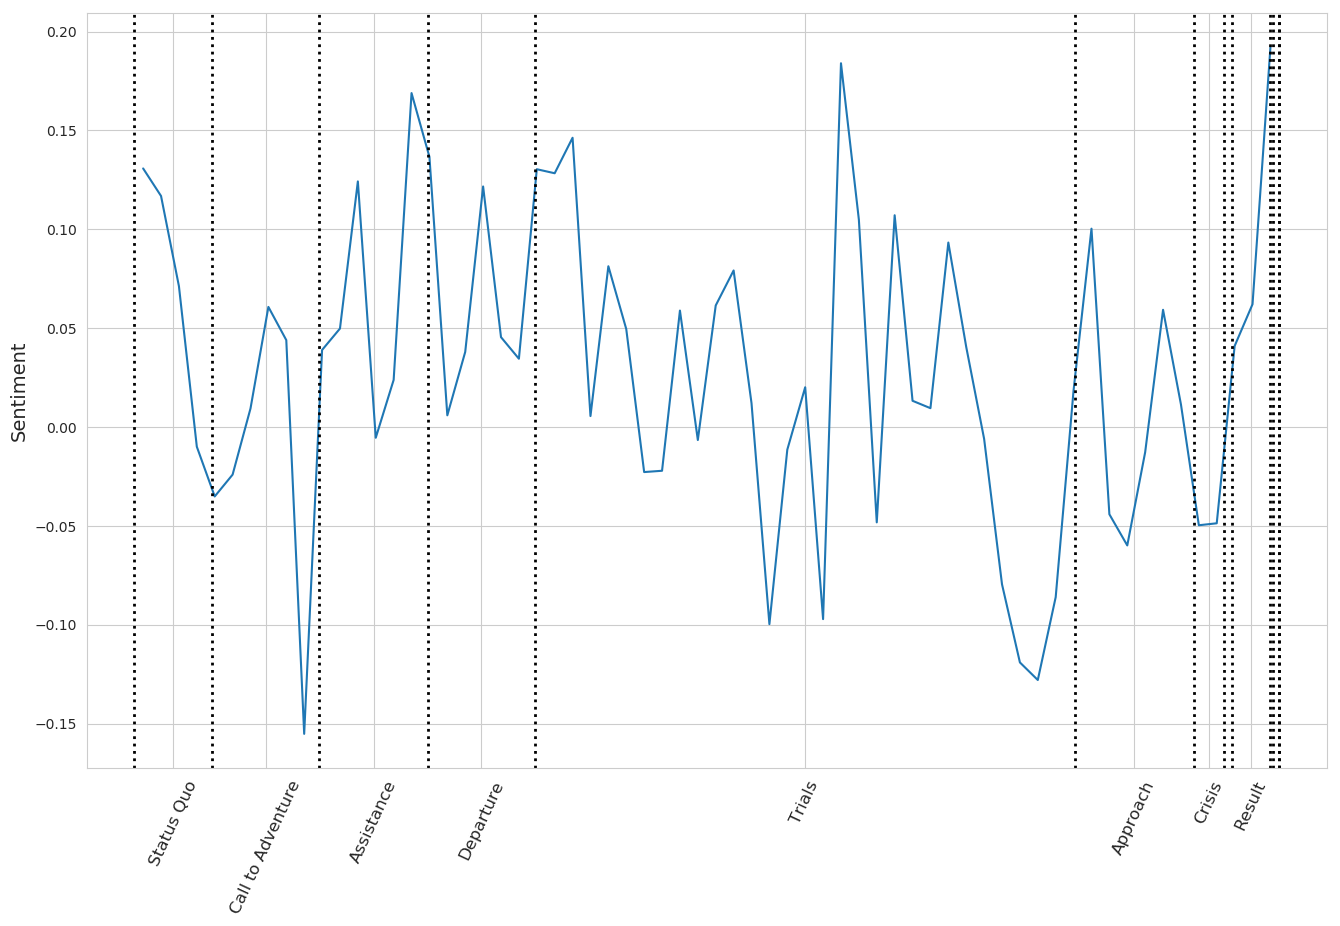

In [43]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(16,10),dpi=100)
ax = sns.lineplot(x=indicies, y=bins)
ax.set_ylabel("Sentiment", fontsize=14)


for i in range(len(stage_pos)):
    plt.axvline(x=stage_pos[i], color='black', linewidth=2, linestyle=':')
    

_ = plt.xticks([(stage_pos[i-1] + stage_pos[i])/2 for i in range(1, len(stage_pos) - 3) if i != 8], hero_df.loc[hero_df['Stage'] != 'Treasure', 'Stage'], rotation=65,
           fontsize=12)

### Zipf's Law

In [44]:
top_words = {
    'the': 0, 'of': 0, 'and': 0, 'to': 0, 'a': 0, 'in': 0, 'is': 0, 'i': 0, 'that': 0, 'it': 0, 'for': 0,
    'you': 0, 'was': 0, 'with': 0, 'on': 0, 'as': 0, 'have': 0, 'but': 0, 'be': 0, 'they': 0
}

In [45]:
body = ' '.join(HP.body)
text = body.lower()

In [46]:
for i in top_words.keys():
    top_words[i] = len(re.findall(' ' + i + ' ', text))

In [47]:
zipf_df = pd.DataFrame.from_dict(top_words, orient='index').reset_index()
zipf_df.columns = ['Word', 'Count']

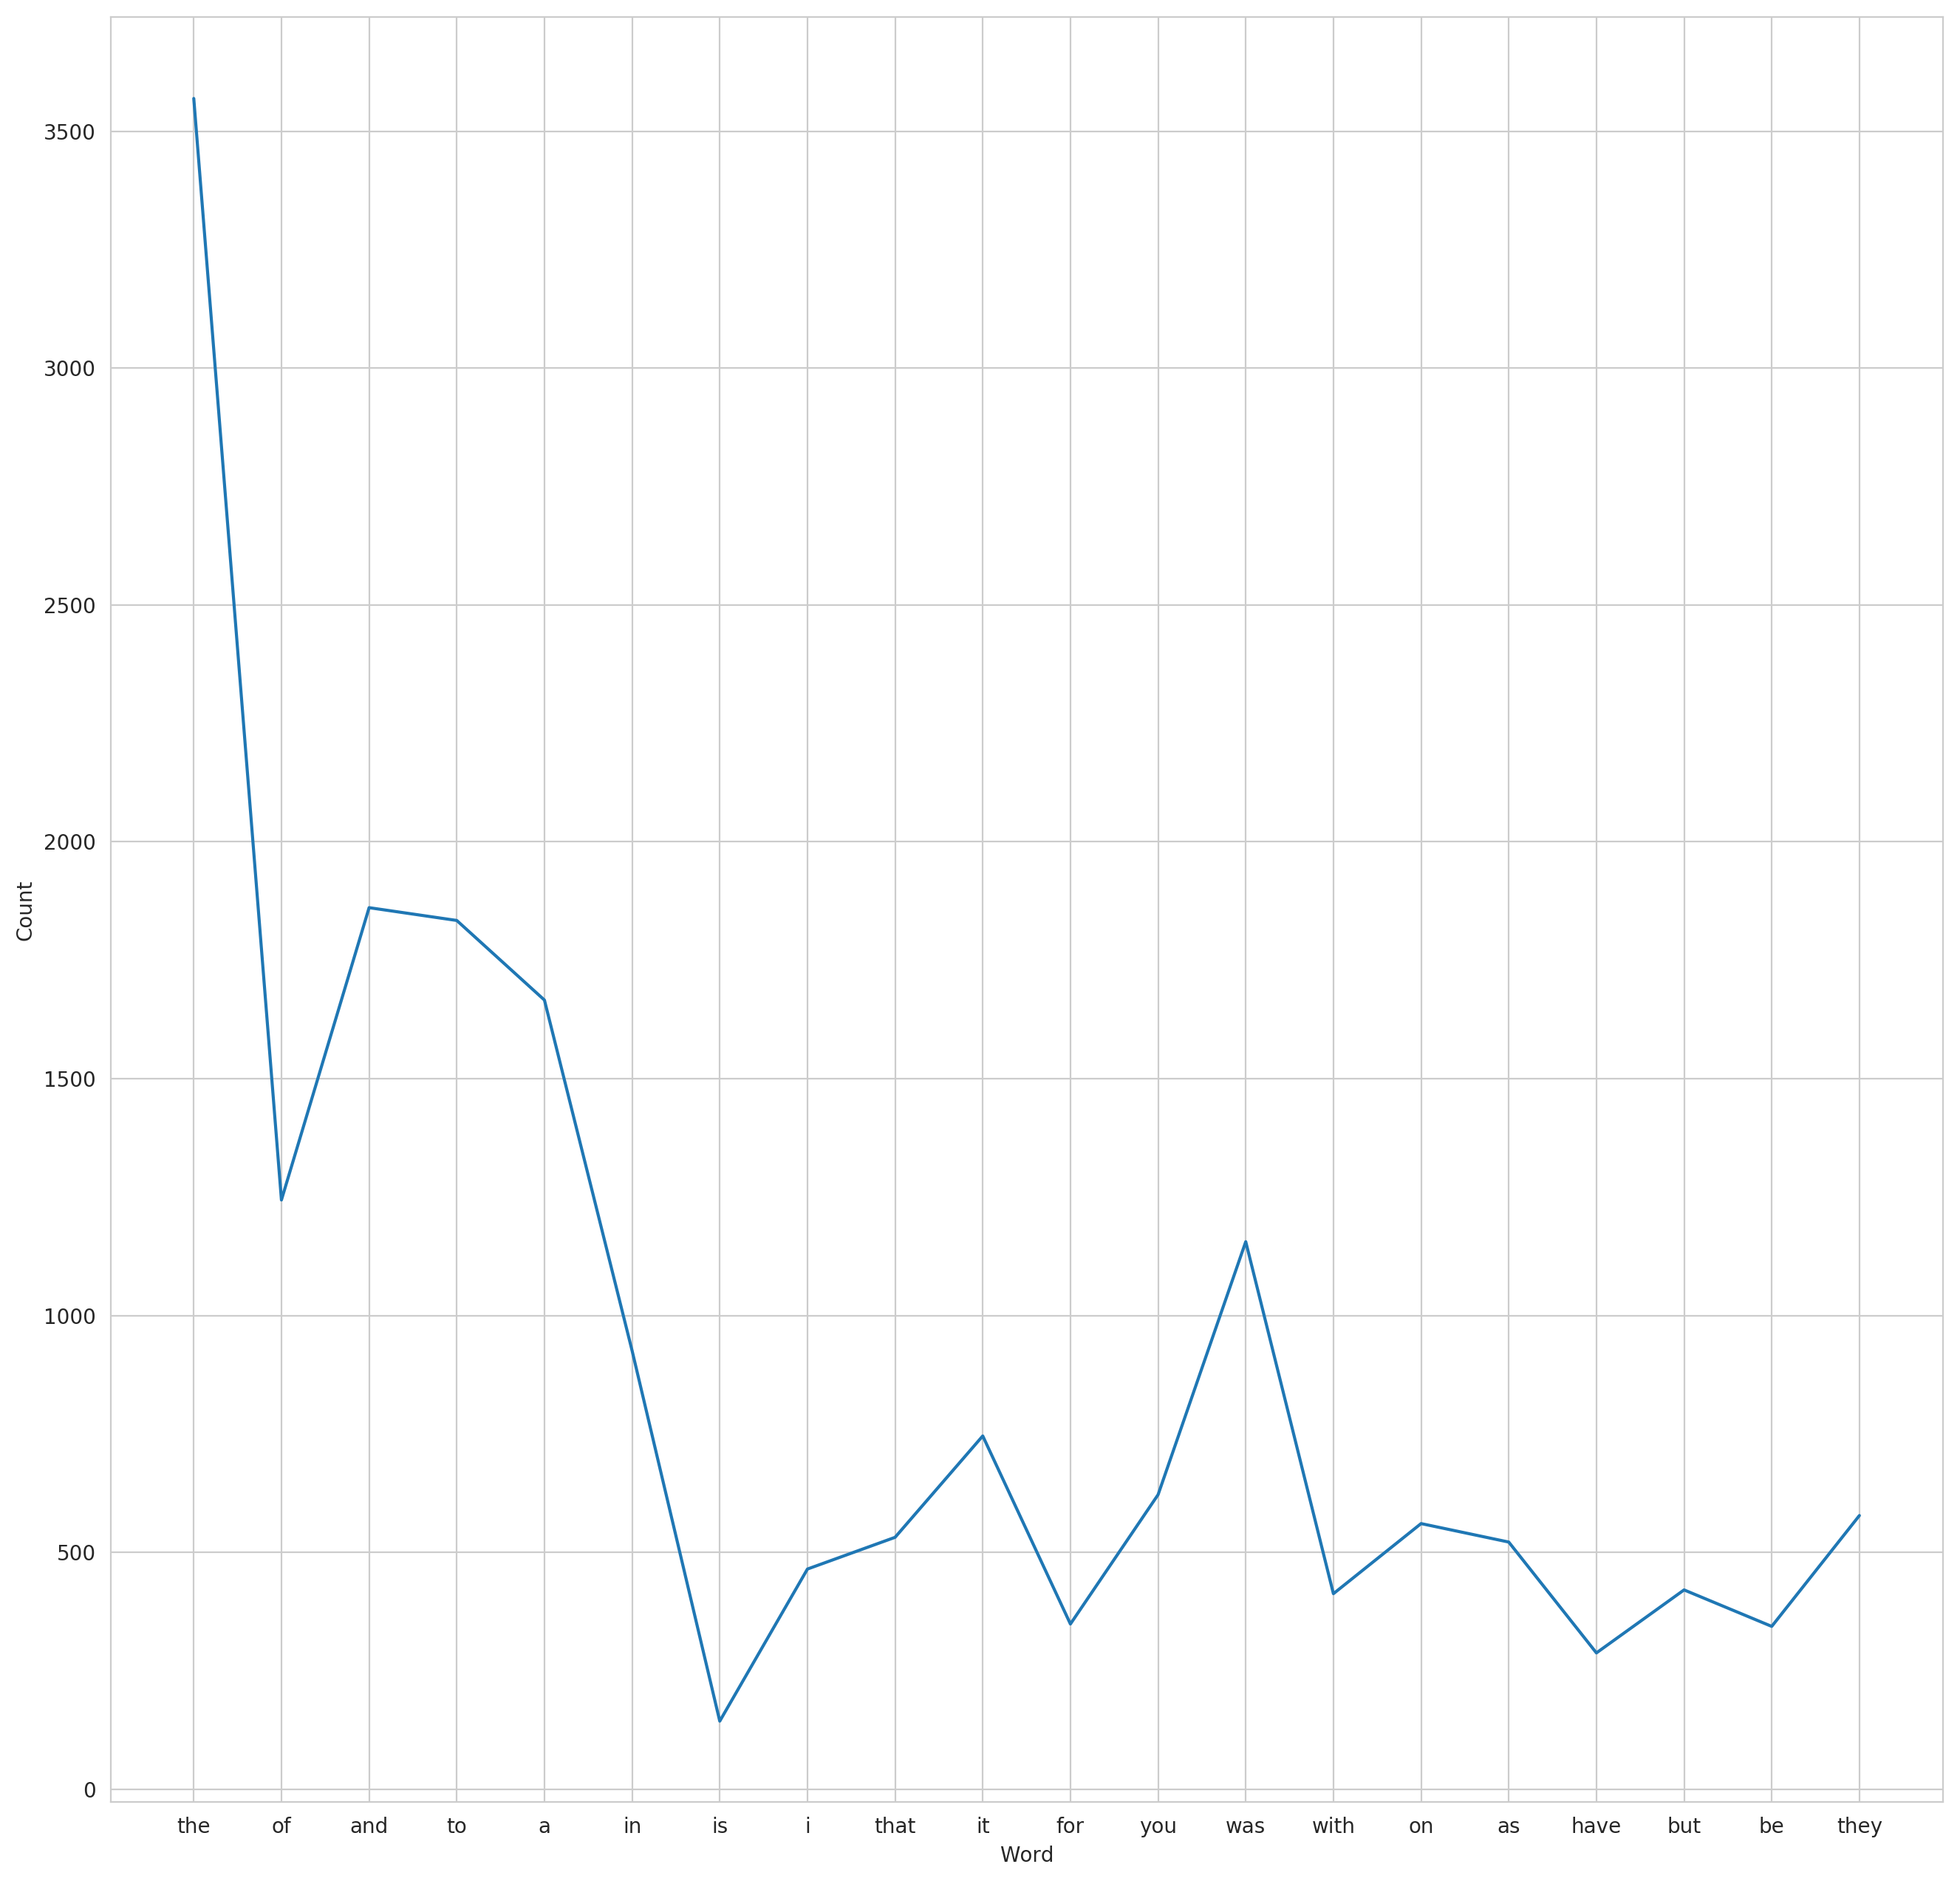

In [48]:
ax = plt.subplots(figsize=(16,16),dpi=200)
ax = sns.lineplot(data=zipf_df, x='Word', y='Count', sort=False)